In [1]:
import configobj
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
%matplotlib inline

In [2]:
config = configobj.ConfigObj('/Users/tminehardt/.authtoken_Quandl')
authtoken = config['authtoken']

In [21]:
CL_dict = {}
for i in range(1, 37):
    name = 'CL' + str(i)
    contract = 'CHRIS/CME_CL' + str(i)
    CL_dict[name] = quandl.get(contract, authtoken=authtoken)
    

In [22]:
for i in CL_dict.keys():
    CL_dict[i].to_csv(i +'.csv')

In [20]:
CLZ2014.to_csv('CLZ2014.csv')

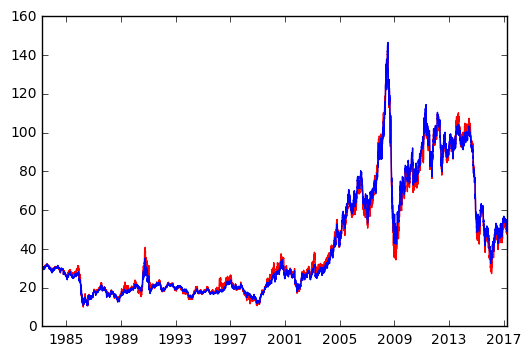

In [26]:
plt.plot(CL_dict['CL1'].Open, 'r')
plt.plot(CL_dict['CL5'].Open, 'b')

In [28]:
CL_Indiv_dict = {}
for i in range(1983, 2018):
    for j in ['F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'Q', 'U', 'V', 'X', 'Z']:
        name = 'CL' + j + str(i)
        contract = 'CME/CL' + j + str(i)

CME/CLF1983
CME/CLG1983
CME/CLH1983
CME/CLJ1983
CME/CLK1983
CME/CLL1983
CME/CLM1983
CME/CLN1983
CME/CLQ1983
CME/CLU1983
CME/CLV1983
CME/CLX1983
CME/CLZ1983
CME/CLF1984
CME/CLG1984
CME/CLH1984
CME/CLJ1984
CME/CLK1984
CME/CLL1984
CME/CLM1984
CME/CLN1984
CME/CLQ1984
CME/CLU1984
CME/CLV1984
CME/CLX1984
CME/CLZ1984
CME/CLF1985
CME/CLG1985
CME/CLH1985
CME/CLJ1985
CME/CLK1985
CME/CLL1985
CME/CLM1985
CME/CLN1985
CME/CLQ1985
CME/CLU1985
CME/CLV1985
CME/CLX1985
CME/CLZ1985
CME/CLF1986
CME/CLG1986
CME/CLH1986
CME/CLJ1986
CME/CLK1986
CME/CLL1986
CME/CLM1986
CME/CLN1986
CME/CLQ1986
CME/CLU1986
CME/CLV1986
CME/CLX1986
CME/CLZ1986
CME/CLF1987
CME/CLG1987
CME/CLH1987
CME/CLJ1987
CME/CLK1987
CME/CLL1987
CME/CLM1987
CME/CLN1987
CME/CLQ1987
CME/CLU1987
CME/CLV1987
CME/CLX1987
CME/CLZ1987
CME/CLF1988
CME/CLG1988
CME/CLH1988
CME/CLJ1988
CME/CLK1988
CME/CLL1988
CME/CLM1988
CME/CLN1988
CME/CLQ1988
CME/CLU1988
CME/CLV1988
CME/CLX1988
CME/CLZ1988
CME/CLF1989
CME/CLG1989
CME/CLH1989
CME/CLJ1989
CME/CLK1989
CME/

In [4]:
VIX.columns = ['Open', 'High', 'Low', 'Close']  # Properly name the columns for this case.

In [5]:
len(SPY), len(VIX)  # Will need both arrays to be the same size.

(5891, 3138)

In [6]:
x = pd.merge(VIX, SPY, left_index=True, right_index=True, suffixes=('_VIX', '_SPY'))

In [7]:
predictor = x.Open_VIX - x.Close_VIX.shift(periods=1)  # Today's open - yesterday's close.

In [8]:
predictor.dropna(inplace=True)  # Drop NaNs from the shift operation. Will truncate array by 1 at start of array.

In [9]:
predictor = np.asarray(predictor)  # Make this a numpy array.

In [10]:
target = x.Close_SPY - x.Open_SPY  # Today's close - today's open.

In [11]:
target = np.asarray(target)[1:]  # Make this a numpy array, slice to match length of predictor (from start).

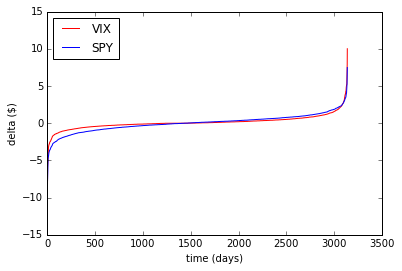

In [26]:
plt.plot(np.sort(predictor), 'r-', label='VIX')
plt.plot(np.sort(target), 'b-', label='SPY')
plt.ylabel('delta ($)')
plt.xlabel('time (days)')
plt.legend()
plt.rcParams['legend.loc'] = 'upper left'
plt.show()  # A quick look at the distributions.